In [66]:
import pandas as pd 
data = pd.read_pickle("clean_data.pkl") 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5262 entries, 0 to 7174
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Marquage          5262 non-null   object        
 1   Famille           5262 non-null   object        
 2   Date Validité     4706 non-null   datetime64[ns]
 3   Etat              5262 non-null   object        
 4   ATELIER / ILOT    5083 non-null   object        
 5   DATE_REALISATION  4639 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 287.8+ KB


In [67]:
#palette couleurs 
colors = {
'midnight_green' : (8/255, 76/255, 97/255),

'timberwolf' : (215/255, 213/255, 216/255),

'snow' : (250/255, 240/255, 240/255),

'indian_red': (225/255, 106/255, 102/255),

'fire_brick' : (184/255, 45/255, 40/255),

'flame' : (204/255, 90/255, 41/255),

'auburn' : (153/255, 34/255, 30/255),

'saffron' : (227/255, 181/255, 5/255),

'payne_gray' : (79/255, 109/255, 122/255),

'verdigis' : (86/255, 163/255, 166/255),

'gunmetal' : (42/255, 48/255, 52/255)
}

In [ ]:
#====================titre principal
def titre(ax, spine_color, facecolor, titre_wrapp, text_color):
    ax.set_xticks([])
    ax.set_yticks([])  
    for spine in ax.spines.values():
        spine.set_color(spine_color)
    ax.set_facecolor(facecolor) 
    ax.text(0.5, 0.5, #positions x, y 

        titre_wrapp,  

        fontsize=16, #taille 

        color=text_color, #couleur 

        ha='center', #alignement horizontal 

        va='center', #alignement vertical 
        
        fontweight='bold'
        )
#======================titre nv1    
def titre_nv1(ax, spine_color, facecolor, titre_wrapp, text_color):
    ax.set_xticks([])
    ax.set_yticks([])  
    for spine in ax.spines.values():
        spine.set_color(spine_color)
    ax.set_facecolor(facecolor) 
    ax.text(0.5, 0.5, #positions x, y 

        titre_wrapp,  

        fontsize=14, #taille 

        color=text_color, #couleur 

        ha='center', #alignement horizontal 

        va='center', #alignement vertical 
        
        fontweight='bold'
        )
#====================titre nv2   
def titre_nv2(ax,x,y, spine_color, facecolor, titre_wrapp, text_color):
    ax.set_xticks([])
    ax.set_yticks([])  
    for spine in ax.spines.values():
        spine.set_color(spine_color)
    ax.set_facecolor(facecolor) 
    ax.text(x, y, #positions x, y 

        titre_wrapp,  

        fontsize=12, #taille 

        color=text_color, #couleur 

        ha='center', #alignement horizontal 

        va='center', #alignement vertical 
        
        fontweight='bold'
        )

#====================zone texte    
def zone_commentaires(ax, x, y, wrapped_combo, fontsize, text_color, spine_color, facecolor, fontweight) :
    ax.text(x, y,
          wrapped_combo, #texte
          ha='left',
          va='center',
          fontsize=fontsize,
          color=text_color,
          fontweight=fontweight)
    ax.set_xticks([])
    ax.set_yticks([])  # suppresion axes
    for spine in ax.spines.values():  
        spine.set_color(spine_color) #couleur bordure
    ax.set_facecolor(facecolor) #couleur de fond

#===================tableau personnalisé    
def mon_tableau(ax, tab,
                couleur_colonnes,        # Couleur(s) pour les colonnes d’en-tête (peut être une seule ou une liste)
                fontsize,                # Taille de police des cellules
                scale_x, scale_y,        # Échelle globale du tableau
                head_fontsize,           # Taille du texte dans l’en-tête
                head_weight='bold',             # Poids du texte d’en-tête ('bold', 'normal'…)
                head_color='black',              # Couleur du texte d’en-tête
                head_facecolor='white',          # Couleur de fond de l’en-tête
                pair_facecolor='white',          # Couleur lignes paires
                impair_facecolor='white',        # Couleur lignes impaires
                text_color='black',              # Couleur du texte du corps
                text_wrapp=None,         # Largeur pour retour à la ligne automatique (None = pas de wrap)
                linewidth=1,             # Largeur lignes 
                line_color='black',      # Couleur des bordures
                alpha_bg=1.0,            # Transparence des fonds (0.0 = transparent ; 1.0 = opaque)
                align='center',          # Alignement horizontal du texte
                valign='center',         # Alignement vertical du texte
                row_height=0.1,          # Hauteur de chaque ligne
                col_ratios=None,         # Liste de ratios pour la largeur des colonnes
                col_head_color=None,     # couleur de la première colonne
                col_head_text_color = None,    #couleur texte colonne en tête
                col_pair_color=None,     #couleur des colonnes pair
                col_impair_color=None    # couleur des colonnes impairs
                
                ):        
    """
    Crée un tableau matplotlib stylisé avec options avancées de présentation.
    """

    import textwrap
    import matplotlib.colors as mcolors

    ax.axis('off')

    n_cols = len(tab.columns)

    # Création du tableau
    table = ax.table(
        cellText=tab.values,
        colLabels=tab.columns,
        loc='center',
        cellLoc=align,
        colColours=[mcolors.to_rgba(c, alpha=alpha_bg) for c in (
            couleur_colonnes if isinstance(couleur_colonnes, list) else [couleur_colonnes] * n_cols
        )]
    )

    table.auto_set_font_size(False)
    table.set_fontsize(fontsize)
    table.scale(scale_x, scale_y)

    # Application du ratio de largeur des colonnes si défini
    if col_ratios and len(col_ratios) == n_cols:
        for j in range(n_cols):
            for i in range(len(tab) + 1):  # +1 pour inclure l’en-tête
                cell = table[(i, j)]
                cell.set_width(col_ratios[j])
    
    for (i, j), cell in table.get_celld().items():
        cell.set_linewidth(linewidth)
        cell.set_edgecolor(line_color)
        cell.set_height(row_height)

        # Alignements
        cell.get_text().set_ha(align)
        cell.get_text().set_va(valign)

        if i == 0:
            # En-tête
            cell.set_facecolor(mcolors.to_rgba(head_facecolor, alpha=alpha_bg))
            cell.get_text().set_color(head_color)
            cell.get_text().set_fontweight(head_weight)
            cell.get_text().set_fontsize(head_fontsize)

            if text_wrapp:
                wrapped = textwrap.fill(cell.get_text().get_text(), width=text_wrapp)
                cell.get_text().set_text(wrapped)
        else:
            # Lignes corps
            bg_color = pair_facecolor if i % 2 == 0 else impair_facecolor
            cell.set_facecolor(mcolors.to_rgba(bg_color, alpha=alpha_bg))
            cell.get_text().set_color(text_color)

            if text_wrapp:
                wrapped = textwrap.fill(cell.get_text().get_text(), width=text_wrapp)
                cell.get_text().set_text(wrapped)
        
        # colonne entête        
        if col_head_color:
            if j == 0:
                cell.set_facecolor(col_head_color)
                cell.get_text().set_color(col_head_text_color)
        else:
            if col_pair_color:
                if j%2 == 0:
                    cell.set_facecolor(col_pair_color)
                else:
                    cell.set_facecolor(col_impair_color)
            
                
        








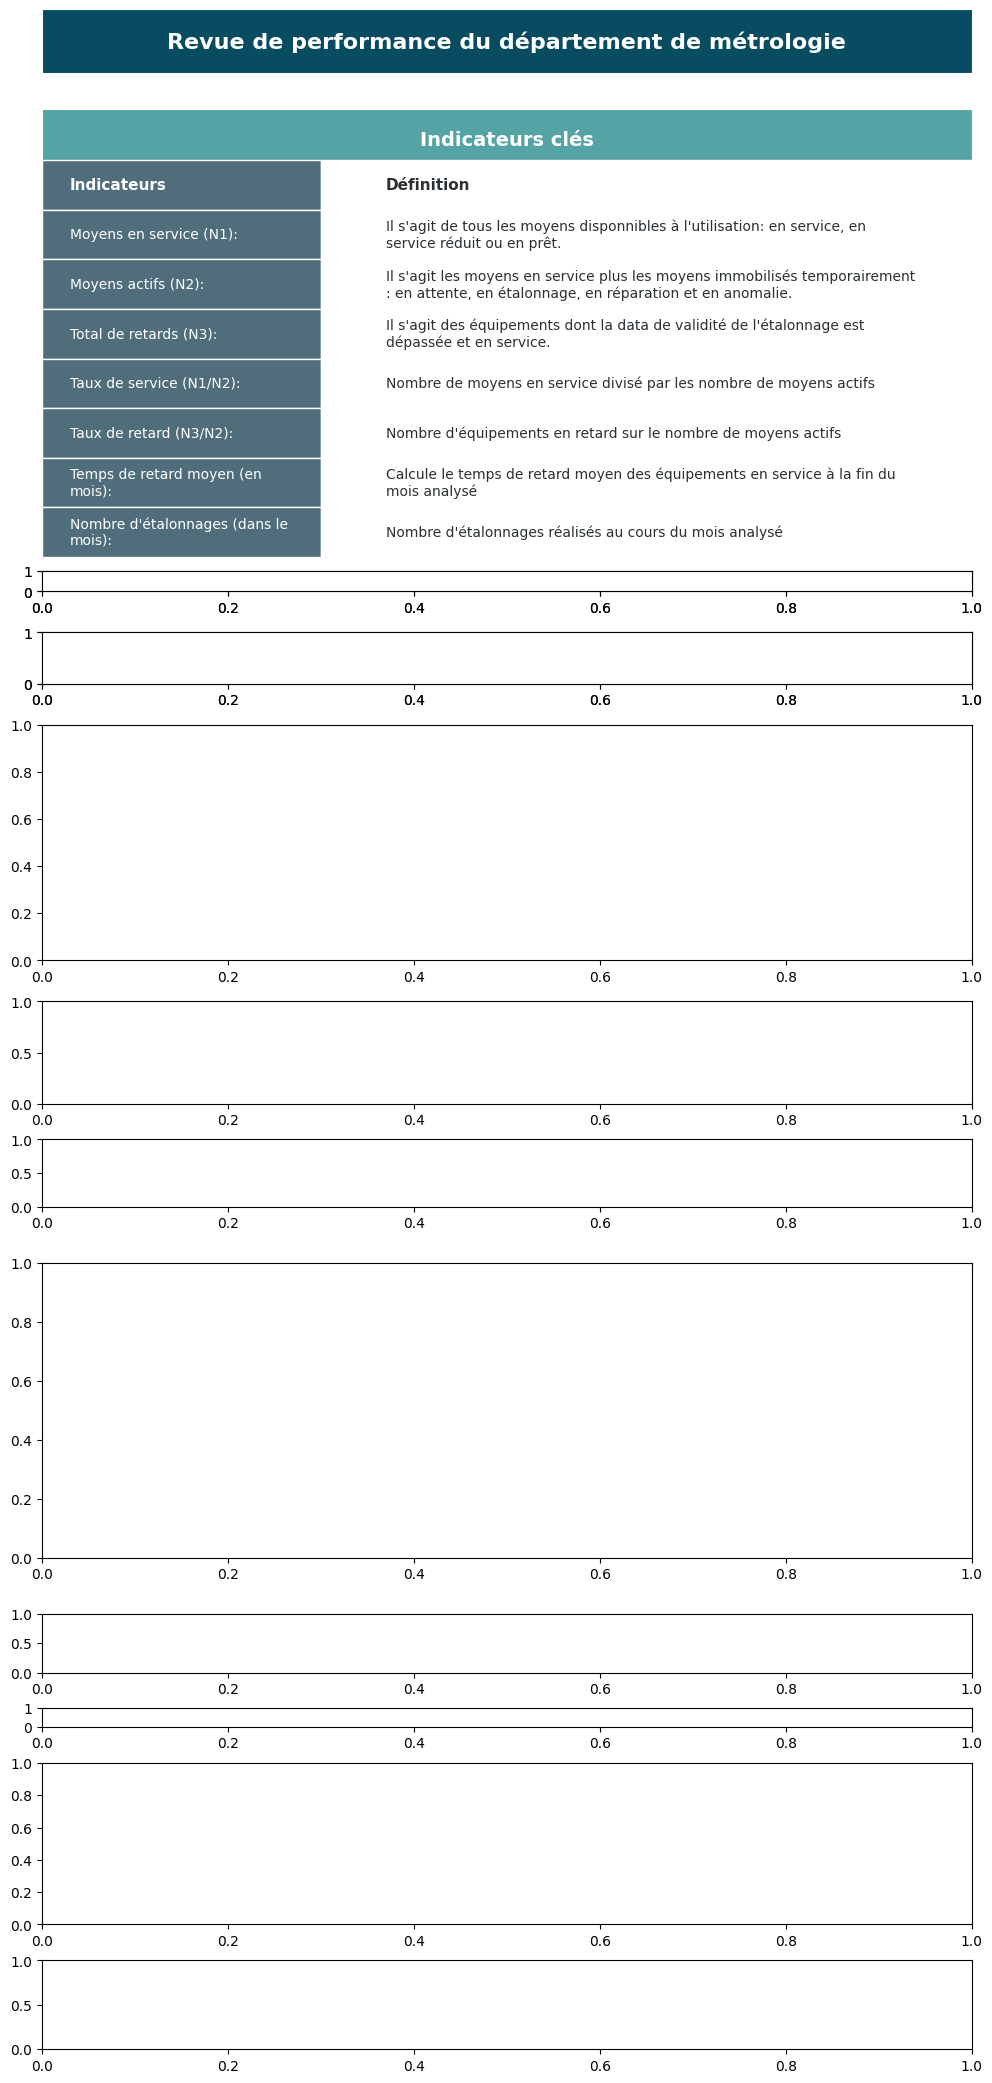

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec 
import seaborn as sns
import textwrap
from matplotlib.patches import Patch

fig = plt.figure(figsize=(12, 30))

# Grille principale divisée en 3 grandes zones
gs_main = gridspec.GridSpec(nrows=6, ncols=1, height_ratios=[0.03, 0.2, 0.25, 0.25,0.16,0.11], hspace=0.1)

#================================= zone 1: Titre ===================================================
titre_principal = fig.add_subplot(gs_main[0, :])
wrapped_titre = textwrap.fill("Revue de performance du département de métrologie", width=130)
titre(titre_principal, 'white', colors['midnight_green'], wrapped_titre, 'white')

#================================= zone 2: Indicateurs clés ========================================
gs_zone2 = gridspec.GridSpecFromSubplotSpec(
    2, 6,
    subplot_spec=gs_main[1],
    height_ratios=[0.15,0.85],
    hspace=0.05, wspace=0.05
)
titre1 = fig.add_subplot(gs_zone2[0, :])
wrapped_titre1 = textwrap.fill("Indicateurs clés", width=130)
titre_nv1(titre1, 'white', colors['verdigis'], wrapped_titre1,'white')

#Indicateurs clés
texte1 = fig.add_subplot(gs_zone2[1, :])



#================================= zone 3: Distribution retards ====================================
gs_zone3 = gridspec.GridSpecFromSubplotSpec(
    4, 6,
    subplot_spec=gs_main[2],
    height_ratios=[0.05,0.125,0.575,0.25],  # ligne 3 pour légende
    hspace=0.4, wspace=2
)

titre2 = fig.add_subplot(gs_zone3[0, :])
texte2 = fig.add_subplot(gs_zone3[1, :])
ax1=fig.add_subplot(gs_zone3[2,:])
texte2b = fig.add_subplot(gs_zone3[3, :])


#================================= zone 4: Distribution etats ======================================
gs_zone4 = gridspec.GridSpecFromSubplotSpec(
    3, 6,
    subplot_spec=gs_main[3],
    height_ratios=[0.16,0.7,0.14],  
    hspace=0.4, wspace=2
)
titre3 = fig.add_subplot(gs_zone4[0, :])
ax2=fig.add_subplot(gs_zone4[1,:])
texte3b = fig.add_subplot(gs_zone4[2, :])

#================================= zone 5: Equipements perdus ======================================
gs_zone5 = gridspec.GridSpecFromSubplotSpec(
    3, 6,
    subplot_spec=gs_main[4],
    height_ratios=[0.07,0.6,0.33],  
    hspace=0.4, wspace=2
)
titre4 = fig.add_subplot(gs_zone5[0, :])
tableau=fig.add_subplot(gs_zone5[1,:])
texte4b = fig.add_subplot(gs_zone5[2, :])


#================================= zone 6: Conclusion ==============================================
gs_zone6 = gridspec.GridSpecFromSubplotSpec(
    2, 6,
    subplot_spec=gs_main[5],
    height_ratios=[0.1,0.9],  
    hspace=0.4, wspace=2
)

titre5 = fig.add_subplot(gs_zone3[0, :])
texte5 = fig.add_subplot(gs_zone3[1, :])


#==========================zone 2: Indicateurs clès=================================================
#zone_commentaires(ax, x, y, wrapped_combo, fontsize, text_color, spine_color, facecolor, fontweight)
moyens_en_service = textwrap.fill("Moyens en service (N1): ", width=30)
moyens_actifs = textwrap.fill("Moyens actifs (N2): ", width=30)
retards = textwrap.fill("Total de retards (N3): ", width=30)
taux_service = textwrap.fill("Taux de service (N1/N2): ", width=30)
taux_retard = textwrap.fill("Taux de retard (N3/N2): ", width=30)
temps_retard_moy = textwrap.fill("Temps de retard moyen (en mois): ", width=30)
nbr_etalonnages = textwrap.fill("Nombre d'étalonnages (dans le mois): ", width=30)


moyens_en_service_def = textwrap.fill("Il s'agit de tous les moyens disponnibles à l'utilisation: en service, en service réduit ou en prêt.", width=75)
moyens_actifs_def = textwrap.fill("Il s'agit les moyens en service plus les moyens immobilisés temporairement : en attente, en étalonnage, en réparation et en anomalie.", width=75)
retards_def = textwrap.fill("Il s'agit des équipements dont la data de validité de l'étalonnage est dépassée et en service.", width=75)
taux_service_def = textwrap.fill("Nombre de moyens en service divisé par les nombre de moyens actifs", width=75)
taux_retard_def = textwrap.fill("Nombre d'équipements en retard sur le nombre de moyens actifs", width=75)
temps_retard_moy_def = textwrap.fill("Calcule le temps de retard moyen des équipements en service à la fin du mois analysé", width=75)
nbr_etalonnages_def = textwrap.fill("Nombre d'étalonnages réalisés au cours du mois analysé", width=75)

indicateurs= [moyens_en_service, moyens_actifs, retards, taux_service, taux_retard, temps_retard_moy, nbr_etalonnages]
indicateurs_def=[moyens_en_service_def, moyens_actifs_def, retards_def, taux_service_def, taux_retard_def, temps_retard_moy_def, nbr_etalonnages_def]
tab_zone2 = pd.DataFrame({'Indicateurs':indicateurs, 'Définition':indicateurs_def}) 

mon_tableau(ax=texte1, tab=tab_zone2, 
            couleur_colonnes='white',fontsize= 10, scale_x=1,scale_y= 2, 
            head_fontsize=11, head_color= colors['gunmetal'], 
            text_color=colors['gunmetal'],
            linewidth=1, line_color='white', 
            align='left', row_height=0.14, 
            col_ratios=[0.3,0.7], col_head_text_color='white',
            col_head_color=colors['payne_gray'], col_pair_color=colors['payne_gray'], col_impair_color=colors['snow'] )

#==========================zone 3: Distribution des retards par atelier=================================================


